### Imports and functions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 


# from src.LE_LoadAndMerge import *
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from copy import deepcopy
from src.multi_model_large_ensemble import MultiModelLargeEnsemble
import matplotlib
matplotlib.rc_file_defaults()
import string

In [3]:
models = ['MIROC6', 'cesm_lens', 'MPI-ESM1-2-LR','EC-Earth3']

In [4]:

regions_dict = {
    'Seattle': {'lat': 47.6, 'lon': 237.7},
    #'Sydney':  {'lat': -33.8, 'lon': 151.2},
    'Lagos':  {'lat': 6.5, 'lon': 3.4},
    'Montreal': {'lat': 45.5, 'lon': 286.2},
}

regions = [region for region in regions_dict]
lats = [values['lat'] for values in regions_dict.values()]
lons = [values['lon'] for values in regions_dict.values()]
region_dim = xr.DataArray(regions, coords={'region': regions})

variable_dim = xr.DataArray(['pr', 'tasmax'], coords={'variable': ['pr', 'tasmax']}, name='variable')


# Download data

## Implicit post-p

In [5]:
# load global data 
tasmax_mmle = MultiModelLargeEnsemble(models,'tasmax', 'day', 
                               lat=slice(None, None), lon=slice(None, None), 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
tasmax_mmle.compute_x(x_type='quantile_return', load=True, name=f'tasmax_default_quantile_return_10yr_1995_2014')

Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tasmax_default_quantile_return_10yr_1995_2014/MIROC6.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tasmax_default_quantile_return_10yr_1995_2014/cesm_lens.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tasmax_default_quantile_return_10yr_1995_2014/MPI-ESM1-2-LR.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/tasmax_default_quantile_return_10yr_1995_2014/EC-Earth3.zarr


In [6]:
tasmax_mmle.compute_LE()

In [7]:
# load global data
pr_mmle = MultiModelLargeEnsemble(models, 'pr', 'day', 
                               lat=slice(None, None), lon=slice(None, None), 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
pr_mmle.compute_x(x_type='quantile_return', load=True, name=f'pr_default_quantile_return_10yr_1995_2014')

Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/pr_default_quantile_return_10yr_1995_2014/MIROC6.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/pr_default_quantile_return_10yr_1995_2014/cesm_lens.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/pr_default_quantile_return_10yr_1995_2014/MPI-ESM1-2-LR.zarr
Loading: gcs://climateai_data_repository/tmp/global_cmip_2.5deg/pr_default_quantile_return_10yr_1995_2014/EC-Earth3.zarr


In [8]:
pr_mmle.compute_LE()

In [9]:
implicit = xr.concat([ds.sel(
    lat=xr.DataArray(lats, coords={'region': region_dim}), 
    lon=xr.DataArray(lons, coords={'region': region_dim}), 
    method='nearest'
) for ds in [pr_mmle.results, tasmax_mmle.results]], dim = variable_dim).drop(('q_values', 'lat', 'lon')) 

## No post-p

In [10]:
region = 'Seattle' 
Seattle_pr_raw = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
Seattle_pr_raw.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

Seattle_tasmax_raw = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
Seattle_tasmax_raw.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

100%|██████████| 1/1 [00:02<00:00,  2.86s/it]

13.036186218261719
0


13.023750305175781
1


13.026775360107422
2


13.018707275390625
3


100%|██████████| 1/1 [00:02<00:00,  2.60s/it]

13.130130767822266
0


13.131599426269531
1



100%|██████████| 1/1 [00:00<00:00,  1.43it/s]



13.121475219726562
2


100%|██████████| 1/1 [00:03<00:00,  3.25s/it]



13.114276885986328
3


In [11]:
Seattle_pr_raw.compute_LE()
Seattle_tasmax_raw.compute_LE()

In [12]:
region = 'Montreal' 
Montreal_pr_raw = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
Montreal_pr_raw.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

Montreal_tasmax_raw = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
Montreal_tasmax_raw.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

100%|██████████| 1/1 [00:03<00:00,  3.07s/it]

13.188793182373047
0


13.157955169677734
1




100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

13.164459228515625
2



100%|██████████| 1/1 [00:03<00:00,  3.40s/it]

13.153369903564453
3


13.226486206054688
0


13.217830657958984
1




100%|██████████| 1/1 [00:00<00:00,  1.48it/s]




13.207111358642578
2


13.213626861572266
3


In [13]:
Montreal_pr_raw.compute_LE()
Montreal_tasmax_raw.compute_LE()

In [14]:
region = 'Lagos' 
Lagos_pr_raw = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
Lagos_pr_raw.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

Lagos_tasmax_raw = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')
Lagos_tasmax_raw.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

100%|██████████| 1/1 [00:02<00:00,  2.89s/it]

13.296260833740234
0


13.265552520751953
1


13.250785827636719
2


13.2574462890625
3


100%|██████████| 1/1 [00:02<00:00,  2.48s/it]

13.325000762939453
0


13.319957733154297
1


13.309425354003906
2


13.296234130859375
3


In [15]:
Lagos_pr_raw.compute_LE()
Lagos_tasmax_raw.compute_LE()

In [16]:
tasmax_raw = xr.concat([Seattle_tasmax_raw.results, Lagos_tasmax_raw.results, Montreal_tasmax_raw.results], dim=region_dim)
pr_raw = xr.concat([Seattle_pr_raw.results, Lagos_pr_raw.results, Montreal_pr_raw.results], dim=region_dim)

In [17]:
raw = xr.concat([ds.sel(
    lat=xr.DataArray(lats, coords={'region': region_dim}), 
    lon=xr.DataArray(lons, coords={'region': region_dim}), 
    method='nearest'
) for ds in [pr_raw, tasmax_raw]], dim = variable_dim).drop(('q_values', 'lat', 'lon')) 

## QDM implicit

In [18]:
region = 'Seattle' 
Seattle_pr_Qdm_implicit = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Seattle_pr_Qdm_implicit.compute_x(x_type='quantile_return', hist_slice = slice('1995', '2014'))

Seattle_tasmax_Qdm_implicit = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Seattle_tasmax_Qdm_implicit.compute_x(x_type='quantile_return', hist_slice = slice('1995', '2014'))







100%|██████████| 1/1 [00:00<00:00,  1.85it/s]





13.301433563232422
0





100%|██████████| 1/1 [00:00<00:00,  2.06it/s]





13.295654296875
1





100%|██████████| 1/1 [00:00<00:00,  2.65it/s]





13.307178497314453
2


13.30147933959961
3










100%|██████████| 1/1 [00:00<00:00,  1.93it/s]






13.304359436035156
0






100%|██████████| 1/1 [00:00<00:00,  2.38it/s]






13.30057144165039
1






100%|██████████| 1/1 [00:00<00:00,  2.98it/s]






13.304264068603516
2


13.306648254394531
3


In [19]:
Seattle_pr_Qdm_implicit.compute_LE()
Seattle_tasmax_Qdm_implicit.compute_LE()

In [20]:
region = 'Montreal' 
Montreal_pr_Qdm_implicit = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Montreal_pr_Qdm_implicit.compute_x(x_type='quantile_return', hist_slice = slice('1995', '2014'))

Montreal_tasmax_Qdm_implicit = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Montreal_tasmax_Qdm_implicit.compute_x(x_type='quantile_return', hist_slice = slice('1995', '2014'))

13.310127258300781
0


13.303382873535156
1









100%|██████████| 1/1 [00:00<00:00,  3.61it/s]









13.306709289550781
2


13.31473159790039
3


















100%|██████████| 1/1 [00:00<00:00,  1.83it/s]










13.314456939697266
0










100%|██████████| 1/1 [00:00<00:00,  2.21it/s]










13.31814956665039
1










100%|██████████| 1/1 [00:00<00:00,  3.16it/s]










13.31418228149414
2


13.325450897216797
3


In [21]:
Montreal_pr_Qdm_implicit.compute_LE()
Montreal_tasmax_Qdm_implicit.compute_LE()

In [22]:
region = 'Lagos' 
Lagos_pr_Qdm_implicit = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Lagos_pr_Qdm_implicit.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

Lagos_tasmax_Qdm_implicit = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Lagos_tasmax_Qdm_implicit.compute_x(x_type='quantile_return', hist_slice = slice('1995', '2014'))



















100%|██████████| 1/1 [00:00<00:00,  2.07it/s]











13.331535339355469
0











100%|██████████| 1/1 [00:00<00:00,  2.30it/s]











13.32373046875
1











100%|██████████| 1/1 [00:00<00:00,  3.85it/s]











13.320140838623047
2


13.329715728759766
3


13.322799682617188
0


13.319564819335938
1














100%|██████████| 1/1 [00:00<00:00,  3.21it/s]














13.329444885253906
2


13.326774597167969
3


In [23]:
Lagos_pr_Qdm_implicit.compute_LE()
Lagos_tasmax_Qdm_implicit.compute_LE()


In [24]:
tasmax_qdm_implicit = xr.concat([Seattle_tasmax_Qdm_implicit.results, Lagos_tasmax_Qdm_implicit.results, Montreal_tasmax_Qdm_implicit.results], dim=region_dim)
pr_qdm_implicit = xr.concat([Seattle_pr_Qdm_implicit.results, Lagos_pr_Qdm_implicit.results, Montreal_pr_Qdm_implicit.results], dim=region_dim)

qdm_implicit = xr.concat([ds.sel(
    lat=xr.DataArray(lats, coords={'region': region_dim}), 
    lon=xr.DataArray(lons, coords={'region': region_dim}), 
    method='nearest'
) for ds in [pr_qdm_implicit, tasmax_qdm_implicit]], dim = variable_dim).drop(('q_values', 'lat', 'lon')) 

## QDM raw

In [25]:
region = 'Seattle' 
Seattle_pr_Qdm = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Seattle_pr_Qdm.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

Seattle_tasmax_Qdm = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Seattle_tasmax_Qdm.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

13.345069885253906
0


13.338092803955078
1

















100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

















13.341480255126953
2


13.337703704833984
3


13.347114562988281
0


13.335433959960938
1


13.339828491210938
2
13.339920043945312
3


In [26]:
Seattle_pr_Qdm.compute_LE()
Seattle_tasmax_Qdm.compute_LE()

In [27]:
region = 'Montreal' 
Montreal_pr_Qdm = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Montreal_pr_Qdm.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

Montreal_tasmax_Qdm = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Montreal_tasmax_Qdm.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

13.3466796875
0
13.356689453125
1
13.352569580078125
2
13.356582641601562
3
13.367382049560547
0
13.363899230957031
1
13.367927551269531
2
13.369731903076172
3


In [28]:
Montreal_pr_Qdm.compute_LE()
Montreal_tasmax_Qdm.compute_LE()

In [29]:
region = 'Lagos' 
Lagos_pr_Qdm = MultiModelLargeEnsemble(models=models, variable='pr', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Lagos_pr_Qdm.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

Lagos_tasmax_Qdm = MultiModelLargeEnsemble(models=models, variable='tasmax', granularity='day', 
                               lat=regions_dict[region]['lat'], lon=regions_dict[region]['lon'], 
                               bucket='climateai_data_repository', path=f'tmp/qdm_{region}')
Lagos_tasmax_Qdm.compute_x(x_type='quantile_return_raw', hist_slice = slice('1995', '2014'))

13.365440368652344
0
13.359855651855469
1
13.364032745361328
2
13.366222381591797
3
13.386192321777344
0





















100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

13.382743835449219
1


13.379020690917969
2


13.378303527832031
3


In [30]:
Lagos_pr_Qdm.compute_LE()
Lagos_tasmax_Qdm.compute_LE()


In [31]:
tasmax_qdm = xr.concat([Seattle_tasmax_Qdm.results, Lagos_tasmax_Qdm.results, Montreal_tasmax_Qdm.results], dim=region_dim)
pr_qdm = xr.concat([Seattle_pr_Qdm.results, Lagos_pr_Qdm.results, Montreal_pr_Qdm.results], dim=region_dim)

qdm = xr.concat([ds.sel(
    lat=xr.DataArray(lats, coords={'region': region_dim}), 
    lon=xr.DataArray(lons, coords={'region': region_dim}), 
    method='nearest'
) for ds in [pr_qdm, tasmax_qdm]], dim = variable_dim).drop(('q_values', 'lat', 'lon')) 

# Plot

In [32]:
qdm['MTratio'] = (qdm.M_LE/(qdm.M_LE+qdm.Ibar_LE))*100
raw['MTratio'] = (raw.M_LE/(raw.M_LE+raw.Ibar_LE))*100
implicit['MTratio'] = (implicit.M_LE/(implicit.M_LE+implicit.Ibar_LE))*100
qdm_implicit['MTratio'] = (qdm_implicit.M_LE/(qdm_implicit.M_LE+qdm_implicit.Ibar_LE))*100

In [33]:
regions = [region for region in regions_dict]
regions

['Seattle', 'Lagos', 'Montreal']

In [34]:
implicit['variable'].values

array(['pr', 'tasmax'], dtype='<U6')

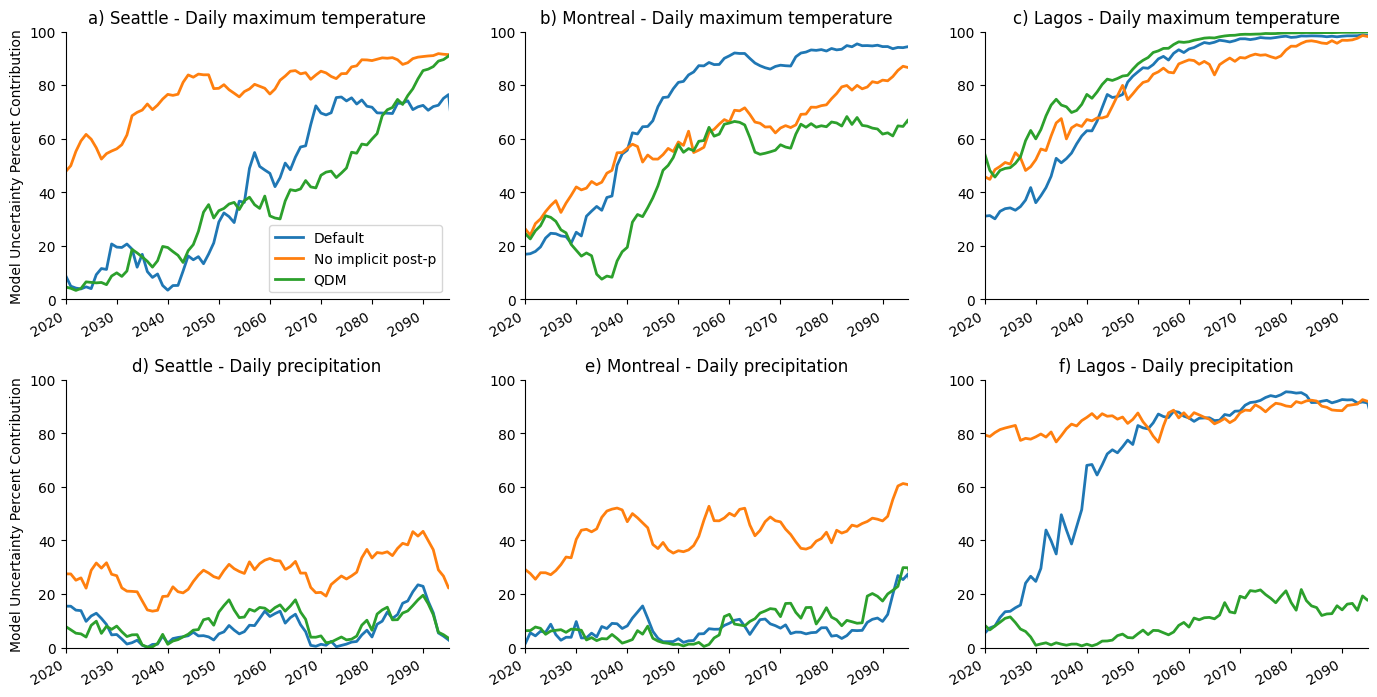

In [63]:
var_dict = {'tasmax': 'Daily maximum temperature', 'pr': 'Daily precipitation'}
fig, axs = plt.subplots(nrows=2,ncols=3, constrained_layout=True,figsize=(14,7))

count = 0
for iv, v in enumerate(['tasmax', 'pr']):
    for ir, r in enumerate(['Seattle', 'Montreal', 'Lagos']):
        ax = axs[iv, ir]

        implicit.sel(variable=v, region=r).MTratio.plot(ax=ax, lw=2,label='Default')
        raw.sel(variable=v, region=r).MTratio.plot(ax=ax, lw=2,label='No implicit post-p')
        #qdm.sel(variable=v, region=r).MTratio.plot(ax=ax, lw=2,label='QDM raw')
        qdm_implicit.sel(variable=v, region=r).MTratio.plot(ax=ax, lw=2,label='QDM')
        
        ax.set_xlim(np.datetime64('2020'), np.datetime64('2095'))
        ax.set_ylim(bottom=0, top=100)
        ax.set_title(f'{string.ascii_lowercase[count]}) {r} - {var_dict[v]}')
        ax.set_xlabel('')
        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)
        # ax.spines["bottom"].set_position(("axes", -0.03)) 
        # ax.spines["left"].set_position(("axes", -0.02))
#         ax.set_facecolor('0.95')
        count += 1
axs[0, 0].legend()
for ax in axs.ravel():
    if ax in axs[:, 0]:
        ax.set_ylabel('Model Uncertainty Percent Contribution')
    else:
        ax.set_ylabel(None)

plt.subplots_adjust(left=0.06, right=0.99, bottom=0.07, top=0.95, wspace=0.20, hspace=0.30)  # all parameters MUST be specified for reproducibility!
# fig.patch.set_facecolor('0.9')   # Hack to get grayscale. To see actual figure size.


In [64]:
fig.savefig('./plots/qdm_comparison.png', dpi=200)


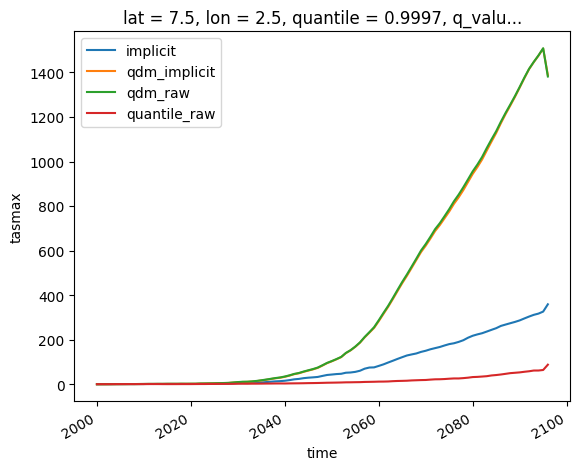

In [37]:
tasmax_mmle.x.sel(lat = regions_dict['Lagos']['lat'], lon = regions_dict['Lagos']['lon'], method='nearest').mean('model').mean('member_id').plot(label = 'implicit')
Lagos_tasmax_Qdm_implicit.x.mean('model').mean('member_id').plot(label='qdm_implicit')
Lagos_tasmax_Qdm.x.mean('model').mean('member_id').plot(label='qdm_raw')
Lagos_tasmax_raw.x.mean('model').mean('member_id').plot(label='quantile_raw')
plt.legend()

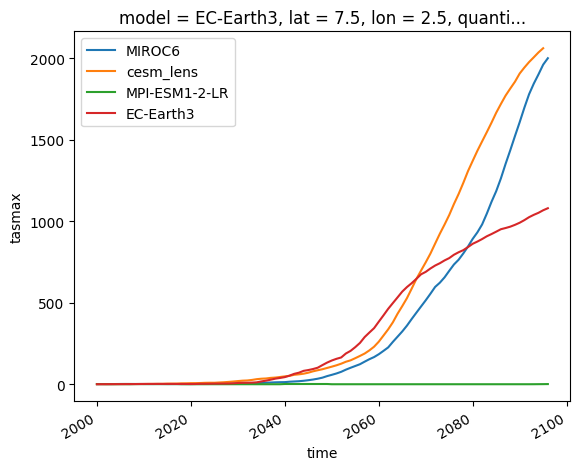

In [38]:
for model in pr_mmle.hist_dsets:
    Lagos_tasmax_Qdm_implicit.x.sel(model=model).mean('member_id').plot(label = model)
plt.legend()


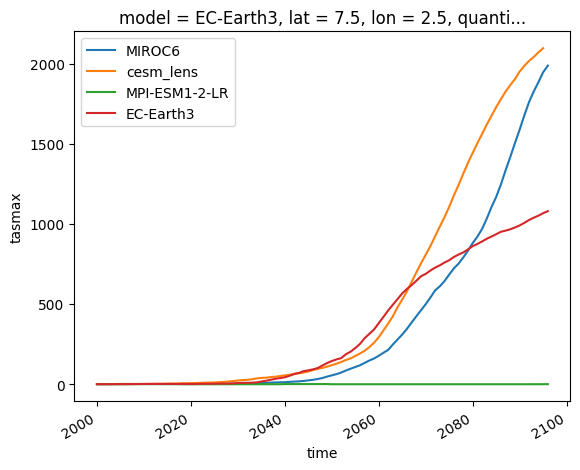

In [39]:
for model in pr_mmle.hist_dsets:
    Lagos_tasmax_Qdm.x.sel(model=model).mean('member_id').plot(label = model)
plt.legend()

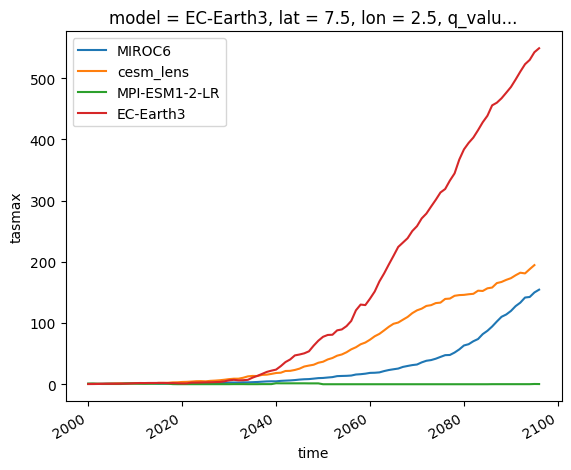

In [40]:
for model in pr_mmle.hist_dsets:
    tasmax_mmle.x.sel(lat = regions_dict['Lagos']['lat'], lon = regions_dict['Lagos']['lon'], method='nearest').sel(model=model).mean('member_id').plot(label = model)
plt.legend()

100%|██████████| 1/1 [00:31<00:00, 31.03s/it]


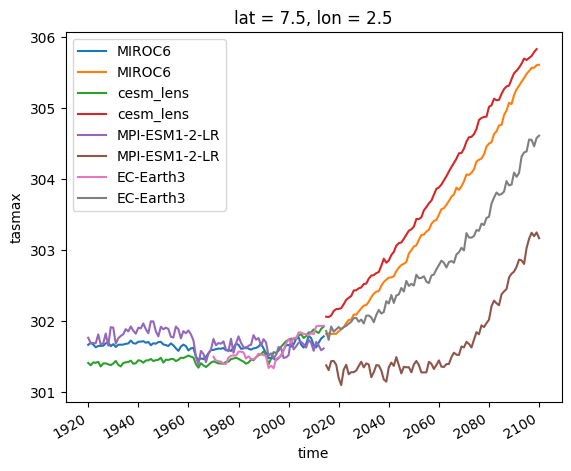

In [41]:
for model in pr_mmle.hist_dsets:
    Lagos_tasmax_Qdm_implicit.hist_dsets[model].mean('member_id').resample(time='AS').mean().plot(label = model)
    Lagos_tasmax_Qdm_implicit.future_dsets[model].mean('member_id').resample(time='AS').mean().plot(label = model)

    plt.legend()

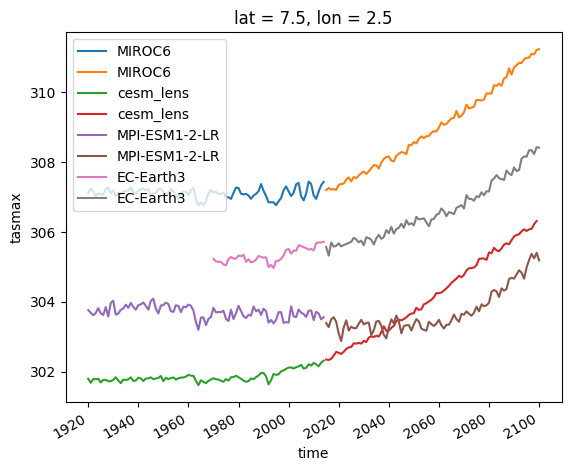

In [42]:
for model in pr_mmle.hist_dsets:
    tasmax_mmle.hist_dsets[model].sel(lat = regions_dict['Lagos']['lat'], lon = regions_dict['Lagos']['lon'], method='nearest').mean('member_id').resample(time='AS').mean().plot(label = model)
    tasmax_mmle.future_dsets[model].sel(lat = regions_dict['Lagos']['lat'], lon = regions_dict['Lagos']['lon'], method='nearest').mean('member_id').resample(time='AS').mean().plot(label = model)

    plt.legend()

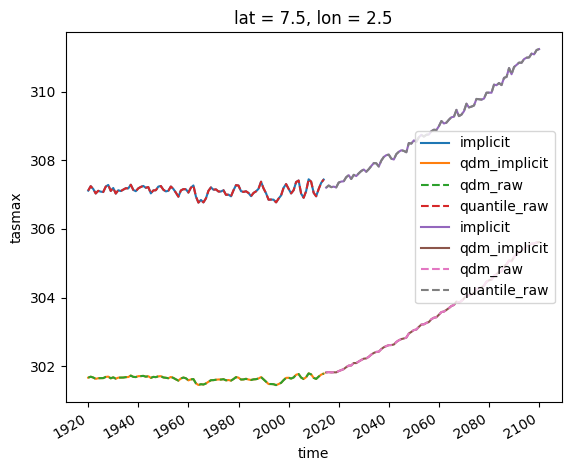

In [43]:
tasmax_mmle.hist_dsets['MIROC6'].sel(lat = regions_dict['Lagos']['lat'], lon = regions_dict['Lagos']['lon'], method='nearest').mean('member_id').resample(time='AS').mean().plot(label = 'implicit')
Lagos_tasmax_Qdm_implicit.hist_dsets['MIROC6'].mean('member_id').resample(time='AS').mean().plot(label = 'qdm_implicit')
Lagos_tasmax_Qdm.hist_dsets['MIROC6'].mean('member_id').resample(time='AS').mean().plot(label = 'qdm_raw', linestyle = 'dashed')
Lagos_tasmax_raw.hist_dsets['MIROC6'].mean('member_id').resample(time='AS').mean().plot(label = 'quantile_raw', linestyle = 'dashed')

tasmax_mmle.future_dsets['MIROC6'].sel(lat = regions_dict['Lagos']['lat'], lon = regions_dict['Lagos']['lon'], method='nearest').mean('member_id').resample(time='AS').mean().plot(label = 'implicit')
Lagos_tasmax_Qdm_implicit.future_dsets['MIROC6'].mean('member_id').resample(time='AS').mean().plot(label = 'qdm_implicit')
Lagos_tasmax_Qdm.future_dsets['MIROC6'].mean('member_id').resample(time='AS').mean().plot(label = 'qdm_raw', linestyle = 'dashed')
Lagos_tasmax_raw.future_dsets['MIROC6'].mean('member_id').resample(time='AS').mean().plot(label = 'quantile_raw', linestyle = 'dashed')

plt.legend()